In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import timedelta
import os
from pandas_profiling import ProfileReport
from pylab import *

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 1000

plt.style.use('fivethirtyeight')

In [3]:
def generate_profile(df):
    '''generate pandas profile'''
 
    profile = ProfileReport(df)   
    profile.to_widgets()

In [4]:
df = pd.read_csv('D:\cap\capstone2\data\interim\eda.csv', low_memory=False, index_col=None)

In [5]:
cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE', 'ACTU-INST', 'ACTU-IRCV',
        'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D', 'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H', 'ALL-L30D',
        'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT', 'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D',
        'GLDR-PIC', 'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D', 'MAKE-L90D', 'MAKE-PIC',
        'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV', 'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOTL',
        'NGHT-INSTRUCT', 'NGHT-IRCV', 'NGHT-L24H', 'NGHT-L30D', 'NGHT-L90D', 'NGHT-PIC', 'NGHT-TOTL', 'SENG-INSTRUCT',
        'SENG-IRCV', 'SENG-L24H', 'SENG-L30D', 'SENG-L90D', 'SENG-PIC', 'SENG-TOTL', 'SIMU-TOTL']

In [6]:
def filler(col):
    df[col] = df[col].fillna(0)
    
for c in cols:
    filler(c)

In [7]:
int_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE', 'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI',
        'INSTRUCT_IAIR', 'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE']

In [8]:
def integer(col):
    df[col] = df[col].astype(int)

In [9]:
integer(int_cols)

In [10]:
#generate_profile(df)

In [11]:
df.head()

,idx,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


In [12]:
df.drop('idx', axis=1, inplace=True)

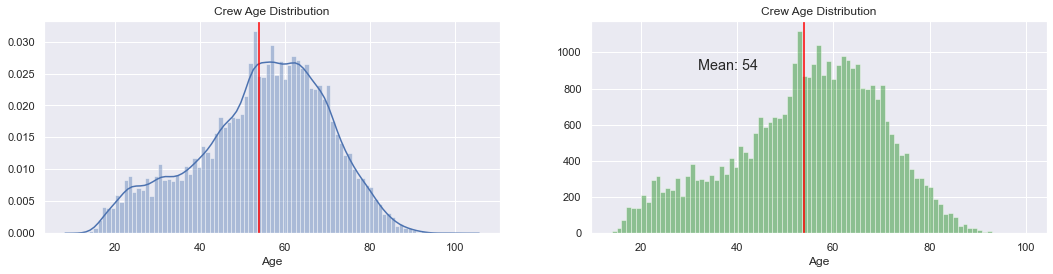

In [13]:
mean = int(df.crew_age.mean())

sns.set(rc={"figure.figsize": (16, 8)})
plt.title('Crew Age Distribution')
subplot(2,2,1)
ax = sns.distplot(df.crew_age, bins=85, axlabel="Age")
plt.axvline(mean, color='red')
plt.title('Crew Age Distribution')

subplot(2,2,2)
ax = sns.distplot(df.crew_age, bins=85, kde=False, color='green', axlabel='Age')
plt.axvline(mean, color='red')
plt.title('Crew Age Distribution')
plt.text(32,900, 'Mean: ' + str(mean), size='large')

plt.show()


In [14]:
df.crew_age.describe()

count    34900.000000
mean        54.635215
std         15.229651
min         14.000000
25%         45.000000
50%         56.000000
75%         66.000000
max        100.000000
Name: crew_age, dtype: float64

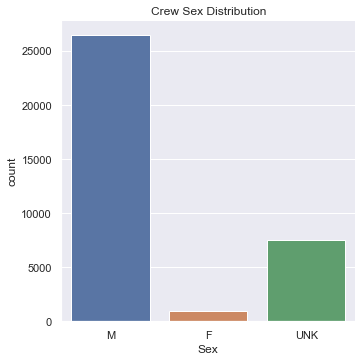

In [15]:
sns.catplot(x="crew_sex", kind="count",  data=df)
plt.title('Crew Sex Distribution')
plt.xlabel("Sex")
plt.show()

In [16]:
df.crew_sex.value_counts()

M      26478
UNK     7503
F        919
Name: crew_sex, dtype: int64

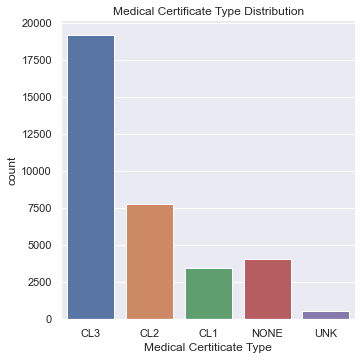

In [17]:
sns.catplot(x="med_certf", kind="count",  data=df)
plt.title('Medical Certificate Type Distribution')
plt.xlabel("Medical Certiticate Type")
plt.show()

In [18]:
df.med_certf.value_counts()

CL3     19146
CL2      7758
NONE     4029
CL1      3440
UNK       527
Name: med_certf, dtype: int64

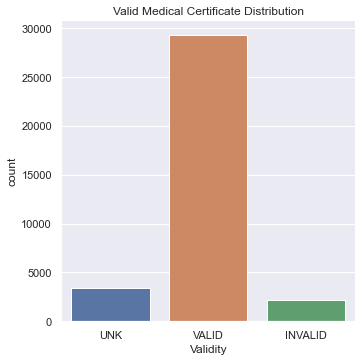

In [19]:
sns.catplot(x="med_crtf_vldty", kind="count",  data=df)
plt.title('Valid Medical Certificate Distribution')
plt.xlabel("Validity")
plt.show()

In [20]:
df.med_crtf_vldty.value_counts()

VALID      29308
UNK         3431
INVALID     2161
Name: med_crtf_vldty, dtype: int64

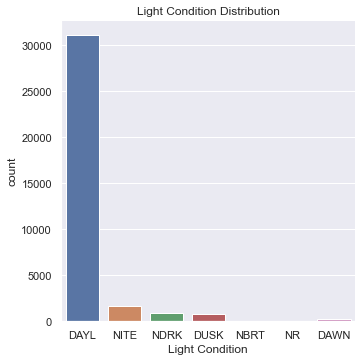

In [21]:
sns.catplot(x="light_cond", kind="count",  data=df)
plt.title('Light Condition Distribution')
plt.xlabel("Light Condition")
plt.show()

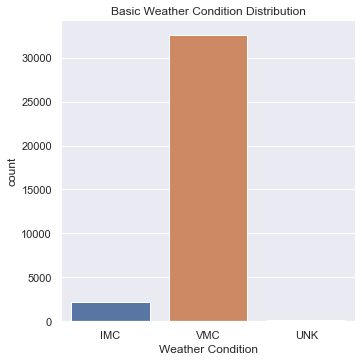

In [22]:
sns.catplot(x="wx_cond_basic", kind="count",  data=df)
plt.title('Basic Weather Condition Distribution')
plt.xlabel("Weather Condition")
plt.show()

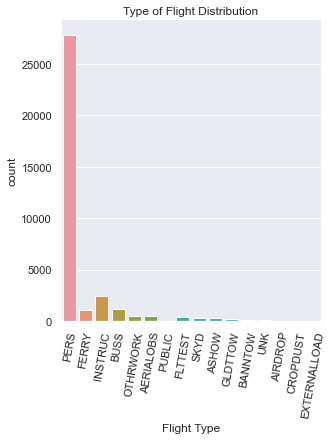

In [23]:
chart = sns.catplot(x="type_fly", kind="count",  data=df)
chart.set_xticklabels(rotation=80)
plt.title('Type of Flight Distribution')
plt.xlabel("Flight Type")
plt.show()

In [24]:
df.type_fly.value_counts()

PERS            27835
INSTRUC          2392
BUSS             1182
FERRY            1032
OTHRWORK          525
AERIALOBS         502
FLTTEST           391
ASHOW             334
SKYD              245
GLDTTOW           178
BANNTOW           134
UNK                54
PUBLIC             44
CROPDUST           21
AIRDROP            14
EXTERNALLOAD       12
Name: type_fly, dtype: int64

## Pilot Certificate Analysis

In [25]:
pilot_cert_cols = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT', 
        'CERT_NONE']

pilot_cert = df[pilot_cert_cols]
pilot_cert.head()

,CERT_ATP,CERT_REC,CERT_CFI,CERT_COMM,CERT_FORN,CERT_MIL,CERT_PRI,CERT_STU,CERT_SPRT,CERT_NONE
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [26]:
pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(pilot_cert['result'] > 1))
print('over 2', sum(pilot_cert['result'] >= 2))
print('over 3', sum(pilot_cert['result'] >= 3))
print('over 4', sum(pilot_cert['result'] >= 4))


over 1 3121
over 2 3121
over 3 200
over 4 5


<ipython-input-26-6dc0af63c239>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pilot_cert["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']


There appears to be some conflicting entries a number of this certificates cannot be held at the same time as one is a higher level that replaces the next lower certificate.

TASK: Run code to retain only the highest certificate level

In [27]:
ATP = df.columns.get_loc('CERT_ATP')
COMM = df.columns.get_loc('CERT_COMM')
PRI = df.columns.get_loc('CERT_PRI')
REC = df.columns.get_loc('CERT_REC')
SPRT = df.columns.get_loc('CERT_SPRT')
STU = df.columns.get_loc('CERT_STU')
NONE = df.columns.get_loc('CERT_NONE')

In [28]:
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, COMM] = 0
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, PRI] = 0
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, REC] = 0
        df.iloc[i, SPRT] = 0
        df.iloc[i, STU] = 0
    elif ((df.iloc[i, REC] == 1) | (df.iloc[i, SPRT] == 1)):
        df.iloc[i, STU] = 0
        
    if (df.iloc[i, ATP] == 0) & (df.iloc[i, COMM] == 0)  &  (df.iloc[i, PRI] == 0) & (df.iloc[i, REC] == 0) & (df.iloc[i, SPRT] == 0) & (df.iloc[i, STU] == 0):
        df.iloc[i, NONE] = 1
        

In [29]:
df["result"] = df['CERT_ATP'] + df['CERT_REC']  + df['CERT_COMM']  + df["CERT_PRI"] + df['CERT_STU'] + df['CERT_SPRT'] + df['CERT_NONE']
print('over 1', sum(df['result'] > 1))
print('over 2', sum(df['result'] >= 2))
print('over 3', sum(df['result'] >= 3))
print('over 4', sum(df['result'] >= 4))

over 1 12
over 2 12
over 3 0
over 4 0


The 12 record with double entries are acceptable as these are sport and recreational certificates.

### TASK - CREATE PILOT CERTIFICATION FEATURE

In [30]:
#use colum indexes previously generated

df['pilot_privileges'] = ""

priv = df.columns.get_loc('pilot_privileges')
for i in range(len(df)):
    if df.iloc[i, ATP] == 1:
        df.iloc[i, priv] = 'ATP'
    elif df.iloc[i, COMM] == 1:
        df.iloc[i, priv] = 'COMMERCIAL'
    elif df.iloc[i, PRI] == 1:
        df.iloc[i, priv] = 'PRIVATE'
    elif df.iloc[i, REC] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, SPRT] == 1:
        df.iloc[i, priv] = 'SPRT/REC'
    elif df.iloc[i, STU] == 1:
        df.iloc[i, priv] = 'STUDENT'
    elif df.iloc[i, NONE] == 1:
        df.iloc[i, priv] = 'NONE'

In [31]:
print(df.columns)

Index(['event_cause', 'far_part', 'crew_category', 'crew_age', 'crew_sex',
       'med_certf', 'med_crtf_vldty', 'light_cond', 'wx_cond_basic',
       'type_fly', 'CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM',
       'CERT_FORN', 'CERT_MIL', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT',
       'CERT_NONE', 'AP_MEL', 'AP_MES', 'AP_SEL', 'AP_SES', 'AP_NONE',
       'INSTRUCT_AME', 'INSTRUCT_ASE', 'INSTRUCT_GLI', 'INSTRUCT_IAIR',
       'INSTRUCT_SPRT', 'INSTRUCT_NONE', 'INSTRUM_APLN', 'INSTRUM_NONE',
       'ACTU-INST', 'ACTU-IRCV', 'ACTU-L24H', 'ACTU-L30D', 'ACTU-L90D',
       'ACTU-PIC', 'ACTU-TOTL', 'ALL-INSTRUM', 'ALL-IRCV', 'ALL-L24H',
       'ALL-L30D', 'ALL-L90D', 'ALL-PIC', 'ALL-TOTL', 'GLDR-INSTRUCT',
       'GLDR-IRCV', 'GLDR-L24H', 'GLDR-L30D', 'GLDR-L90D', 'GLDR-PIC',
       'GLDR-TOTL', 'MAKE-INSTRUCT', 'MAKE-IRCV', 'MAKE-L24H', 'MAKE-L30D',
       'MAKE-L90D', 'MAKE-PIC', 'MAKE-TOTL', 'MENG-INSTRUCT', 'MENG-IRCV',
       'MENG-L24H', 'MENG-L30D', 'MENG-L90D', 'MENG-PIC', 'MENG-TOT

In [32]:
to_drop = ['CERT_ATP', 'CERT_REC', 'CERT_CFI', 'CERT_COMM', 'CERT_PRI', 'CERT_STU', 'CERT_SPRT','CERT_NONE', 'result']
df.drop(to_drop, axis=1, inplace=True)

In [33]:
popped = df.pop('pilot_privileges')
df.insert(10, 'pilot_privileges', popped)

In [34]:
df.head()

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
0,Personnel-Decision making/judgment,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
1,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
2,Enviro-Ceiling/visibility/precip,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
3,Aircraft oper/perf/capability-Altitude-Not att...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0
4,Aircraft oper/perf/capability-(general)-Not at...,91,PILOT,46,M,CL3,UNK,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,0.0


#### Check airplane certs for consistency

In [35]:
ap = df.loc[:,'AP_MEL':'AP_NONE']
ap['result'] = ap['AP_MEL'] + ap['AP_MES'] + ap['AP_SEL'] + ap['AP_SES']


In [36]:
fix = ap[(ap['AP_NONE'] == 1) & (ap['result'] >= 1)]

In [37]:
fix.shape

(0, 6)

Airplane certifications appear consistent.

#### Check Instructor Certification for consistency

In [38]:
Inst = df.loc[:,'INSTRUCT_AME':'INSTRUCT_NONE']
Inst['result'] = Inst['INSTRUCT_AME'] + Inst['INSTRUCT_ASE'] + Inst['INSTRUCT_GLI'] + Inst['INSTRUCT_IAIR'] + Inst['INSTRUCT_SPRT']

In [39]:
fix = Inst[(Inst['INSTRUCT_NONE'] == 1) & (Inst['result'] >= 1)]

In [40]:
fix.shape

(0, 7)

Instructor Certifications appear consisitent

#### Check Intrument Rating for Consistency

In [41]:
I = Inst = df.loc[:,'INSTRUM_APLN':'INSTRUM_NONE']

In [42]:
fix = I[(I['INSTRUM_APLN'] == 1) & (I['INSTRUM_NONE'] == 1)]
fix.shape

(0, 2)

Instrument Certifications appear consisitent

#### IMPUTE TOTAL FLIGHT TIME WITH MAKE FLT TIME IF  MAKE FLT TIME IS LARGER

In [43]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(247, 76)

In [44]:
make_idx = df.columns.get_loc('MAKE-TOTL')
all_idx = df.columns.get_loc('ALL-TOTL')

for i in range(len(df)):
    if df.iloc[i, make_idx] > df.iloc[i, all_idx]:
        df.iloc[i, all_idx] = df.iloc[i, make_idx]

In [45]:
sense = df[df['MAKE-TOTL'] > df['ALL-TOTL']]
sense.shape

(0, 76)

In [46]:
df.shape

(34900, 76)

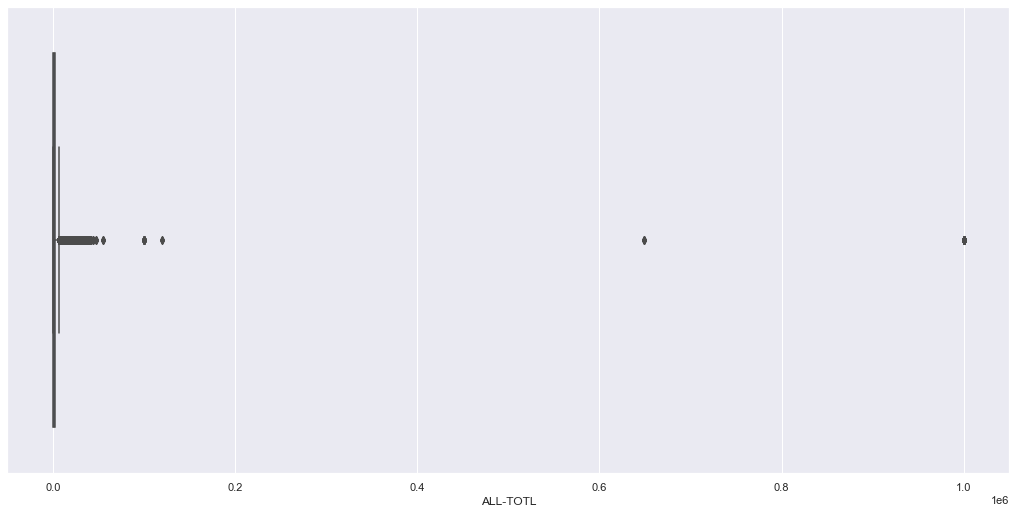

In [47]:
sns.boxplot(x=df['ALL-TOTL'])
plt.show()

#### Remove Outliers on the High end of Total Flight Time

In [48]:
Q1 = df['ALL-TOTL'].quantile(0.25)
Q3 = df['ALL-TOTL'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
df = df[~(df['ALL-TOTL'] > (Q3 + 1.5 * IQR))]
df.shape

2749.5


(30774, 76)

#### Check for Privideges minimum Hours and impute minimums if not met

### ATP

In [49]:


low_atp = df[(df['pilot_privileges'] == 'ATP') & (df['ALL-TOTL'] < 1500)]
low_atp.shape

(107, 76)

In [50]:
def impute_time(priv, ALL, INSTRUM, PIC, NIGHT):
    ''' impute minimum times based on certificate held and its minimums'''
    
    #view number of troubled records
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print(priv, " ", int(low_atp.shape[0]))
    
    
    all_idx = df.columns.get_loc('ALL-TOTL')
    pic_idx = df.columns.get_loc('ALL-PIC')
    intrum_idx = df.columns.get_loc('ALL-INSTRUM')
    priv_idx = df.columns.get_loc('pilot_privileges')
    night_idx = df.columns.get_loc('NGHT-TOTL')
    
    for i in range (len(df)):
        if (df.iloc[i, priv_idx] == priv):
            if df.iloc[i, all_idx] < ALL:
                df.iloc[i, all_idx] = ALL
            if df.iloc[i, pic_idx] < PIC:
                df.iloc[i, pic_idx] = PIC
            if df.iloc[i, intrum_idx] < INSTRUM:
                df.iloc[i, intrum_idx] = INSTRUM
            if df.iloc[i, night_idx] < NIGHT:
                df.iloc[i, night_idx] = NIGHT    
    
    #Chec trouble records left      
    low_atp = df[(df['pilot_privileges'] == priv) & (df['ALL-TOTL'] < ALL)]
    print('Fixed ', priv, " ", int(low_atp.shape[0]))      
            

In [51]:
impute_time ('ATP', 1500, 75, 250, 100)
impute_time ('COMMERCIAL', 250, 10, 100, 5)
impute_time ('PRIVATE', 50, 3, 15, 3)
impute_time ('SPRT/REC', 20, 0, 5, 0)

ATP   107


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  ATP   0
COMMERCIAL   301


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  COMMERCIAL   0
PRIVATE   512


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  PRIVATE   0
SPRT/REC   90


D:\Anaconda\envs\Capstone2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


Fixed  SPRT/REC   0


In [52]:
df.sample(50)

,event_cause,far_part,crew_category,crew_age,crew_sex,med_certf,med_crtf_vldty,light_cond,wx_cond_basic,type_fly,pilot_privileges,CERT_FORN,CERT_MIL,AP_MEL,AP_MES,AP_SEL,AP_SES,AP_NONE,INSTRUCT_AME,INSTRUCT_ASE,INSTRUCT_GLI,INSTRUCT_IAIR,INSTRUCT_SPRT,INSTRUCT_NONE,INSTRUM_APLN,INSTRUM_NONE,ACTU-INST,ACTU-IRCV,ACTU-L24H,ACTU-L30D,ACTU-L90D,ACTU-PIC,ACTU-TOTL,ALL-INSTRUM,ALL-IRCV,ALL-L24H,ALL-L30D,ALL-L90D,ALL-PIC,ALL-TOTL,GLDR-INSTRUCT,GLDR-IRCV,GLDR-L24H,GLDR-L30D,GLDR-L90D,GLDR-PIC,GLDR-TOTL,MAKE-INSTRUCT,MAKE-IRCV,MAKE-L24H,MAKE-L30D,MAKE-L90D,MAKE-PIC,MAKE-TOTL,MENG-INSTRUCT,MENG-IRCV,MENG-L24H,MENG-L30D,MENG-L90D,MENG-PIC,MENG-TOTL,NGHT-INSTRUCT,NGHT-IRCV,NGHT-L24H,NGHT-L30D,NGHT-L90D,NGHT-PIC,NGHT-TOTL,SENG-INSTRUCT,SENG-IRCV,SENG-L24H,SENG-L30D,SENG-L90D,SENG-PIC,SENG-TOTL,SIMU-TOTL
26101,Aircraft oper/perf/capability-Directional cont...,91,PILOT,61,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.00,0.0,0.0,5.0,31.0,220.00,273.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,5.0,31.0,0.00,39.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,5.0,31.0,220.0,273.0,37.0
10312,Fluids/misc hardware-Fuel-Not specified,91,PILOT,68,M,CL3,VALID,DAYL,VMC,PERS,COMMERCIAL,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.00,0.0,0.0,12.0,44.0,100.00,2275.00,0.0,0.0,0.0,0.0,0.0,0.0,122.0,0.00,0.0,0.0,6.0,6.0,0.00,1289.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,70.0,327.0,0.0,0.0,12.0,44.0,0.0,2275.0,45.0
24535,Enviro-Wind,91,PILOT,44,M,CL3,VALID,NITE,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,9.0,23.0,26.00,67.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,9.0,23.0,26.00,67.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.0,0.0,10.0,0.0,0.0,0.0,9.0,23.0,26.0,67.0,4.0
26024,Personnel-Aircraft control,91,STUDENT,32,M,CL1,VALID,DAYL,VMC,INSTRUC,STUDENT,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3.0,34.0,0.0,3.00,34.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3.0,34.0,0.0,3.00,34.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,34.0,0.0,3.0,34.0,0.0
30086,Aircraft oper/perf/capability-Lateral/bank con...,91,PILOT,57,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,1450.0,1480.0,3.00,0.0,0.0,8.0,40.0,1480.00,1570.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,7.0,31.0,2.00,24.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285.0,300.0,0.0,0.0,0.0,0.0,0.0,1463.0,1543.0,0.0
11439,Personnel-Aircraft control,91,PILOT,72,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.0,649.00,698.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,6.00,6.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,23.0,0.0,0.0,0.0,0.0,0.0,649.0,698.0,0.0
5543,Personnel-Aircraft control,91,PILOT,64,M,CL3,VALID,DAYL,IMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,0.0,0.0,0.0,15.00,3513.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7272,Personnel-Limited Experience for Conditions,91,PILOT,54,M,CL3,VALID,DUSK,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,3.00,0.0,2.0,3.0,4.0,15.00,691.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,3.0,3.0,0.00,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,112.0,0.0,0.0,2.0,3.0,4.0,0.0,691.0,69.0
7859,Fluids/misc hardware-Fuel-Not specified,91,PILOT,23,M,CL2,VALID,NITE,VMC,PERS,COMMERCIAL,0,0,1,0,1,0,0,1,1,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.00,368.0,0.0,117.0,150.0,800.00,1000.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,5.0,0.0,80.0,100.0,173.00,173.00,0.0,0.0,0.0,0.0,0.0,356.0,263.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,303.0,0.0,96.0,125.0,430.0,730.0,0.0
787,Personnel-Aircraft control,91,PILOT,55,M,CL3,VALID,DAYL,VMC,PERS,PRIVATE,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.00,0.0,1.0

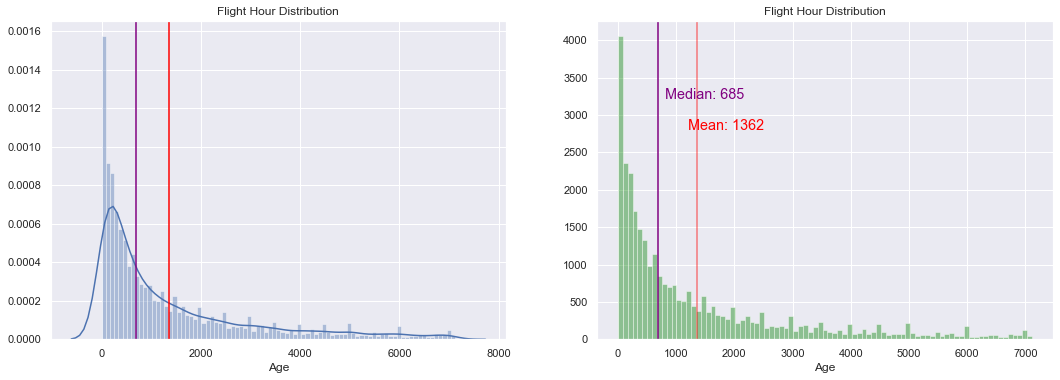

In [53]:
mean = int(df['ALL-TOTL'].mean())
median = int(df['ALL-TOTL'].median())

sns.set(rc={"figure.figsize": (16, 12)})
plt.title('Total Flight Hour Distribution')
subplot(2,2,1)
ax = sns.distplot(df['ALL-TOTL'], bins=85, axlabel="Age")
plt.axvline(mean, color='red')
plt.axvline(median, color='purple')
plt.title('Flight Hour Distribution')

subplot(2,2,2)
ax = sns.distplot(df['ALL-TOTL'], bins=85, kde=False, color='green', axlabel='Age')
plt.axvline(mean, color='red', alpha = 0.5)
plt.title('Flight Hour Distribution')
plt.axvline(median, color='purple')
plt.text(1200,2800, 'Mean: ' + str(mean), size='large', color = 'red')
plt.text(800,3220, 'Median: ' + str(median), size='large', color='purple')
plt.show()

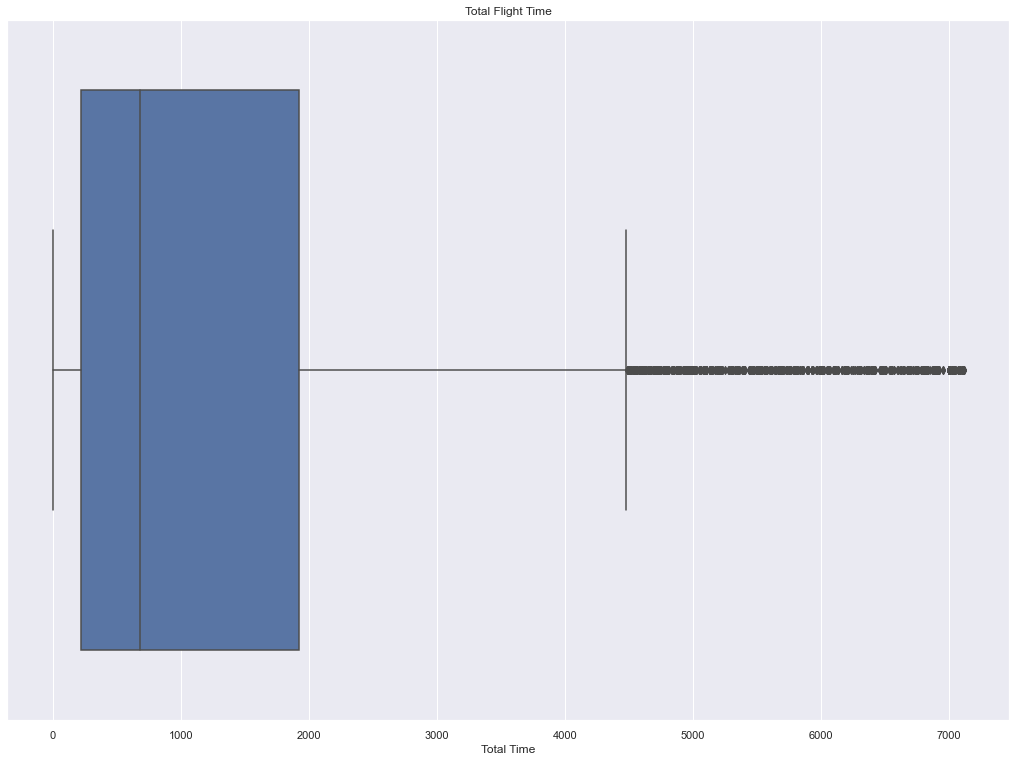

In [54]:
sns.boxplot(x=df['ALL-TOTL'])
plt.title('Total Flight Time')
plt.xlabel('Total Time')
plt.show()